In [29]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# Set up all our data in a couple of data frames.
customers = pd.DataFrame()
customers['purchases_amount'] = [105, 65, 89, 99, 149, 102, 34, 120, 129, 39,
                                 20, 30, 109, 40, 55, 100, 23, 20, 70, 10]
customers['purchases_items'] = [1, 4, 5, 4, 7, 1, 2, 10, 6, 5,
                                1, 3, 2, 1, 5, 10, 3, 3, 1, 1]
customers['promo'] = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
                      1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
customers['email_list'] = [1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
                           0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
customers['checkouts'] = [1, 5, 3, 3, 1, 2, 4, 4, 1, 1,
                          1, 1, 2, 4, 1, 1, 2, 1, 1, 1]

repeat_customer = pd.DataFrame()
repeat_customer['repeat'] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                             0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [31]:
customers


,purchases_amount,purchases_items,promo,email_list,checkouts
0,105,1,1,1,1
1,65,4,1,0,5
2,89,5,0,1,3
3,99,4,1,1,3
4,149,7,0,1,1
5,102,1,0,0,2
6,34,2,0,1,4
7,120,10,0,1,4
8,129,6,0,1,1
9,39,5,1,1,1


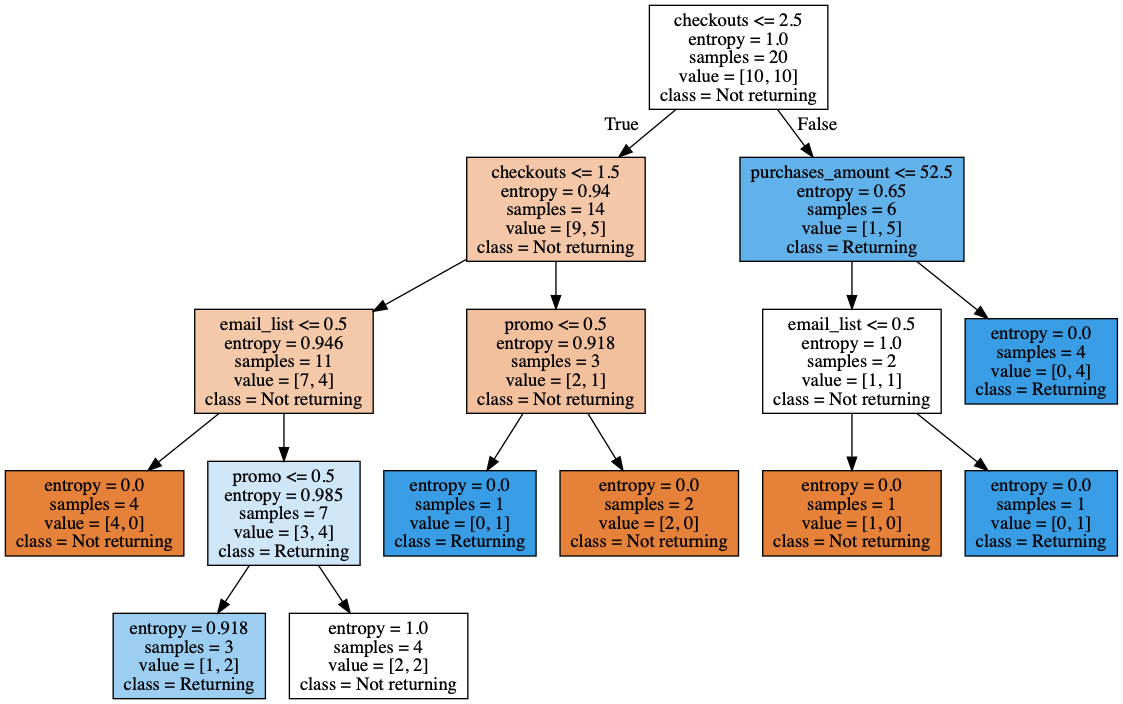

In [32]:
# The model:
from sklearn import tree

# a convenieance for displaying visualizations:
from IPython.display import Image

# Packages for rendering our tree
import pydotplus
import graphviz

# Initialize and train our tree
decision_tree = tree.DecisionTreeClassifier(
        criterion = 'entropy',
        max_features=1,
        max_depth=4,
        random_state=1337
        )
decision_tree.fit(customers, repeat_customer)

# Rendering our tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not returning', 'Returning'],
    filled=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

- **Output**: visualization of our trained tree, for every node it shows the rule being applied, the entropy in the dataset (1 being most uncertain, 0 being totally certain), samples remaining, distribution of samples, and the dominant class. 

- **Following trees**: moving down the tree to the left if you are meeting a rule, moving down to the right if you are outside the rule. For this tree, in branches below the root node, all nodes to the left have checkouts value less than or equal to 2.5, all the nodes to the right have checkouts value that is not less than or equal to 2.5

- **Result**: this tree predicts 11 customers to "Not returning" class, and 9 customers to the "Returning" class

### Parameters when initializing tree:
- criterion='entropy' to use entropy as the method of looking for information gain
- max_features=1 so only one feature will be used per node
- max_depth=4 to set four decision levels below the root node for classification
- random_state=1337 was used just so this tree looks a specific way for this assignment, **don't do this when actually using this model!**

### Reasons to use decision trees: 
- easy to represent the model visually
- can handle varied types of data
- feature selection is a part of the model
- easy to use with little data preparation

### Downsides to using decision trees:
- randomness in their generation can lead to variance in estimates, the tree doesn't build the same way every time
- very prone to overfitting especially when grown too deep or complex
- balanced data is needed, since they are working from information gain they are biased towards the dominant class

## Tinkering with the model: 
- Removing `random state` argument and regenerating the tree:

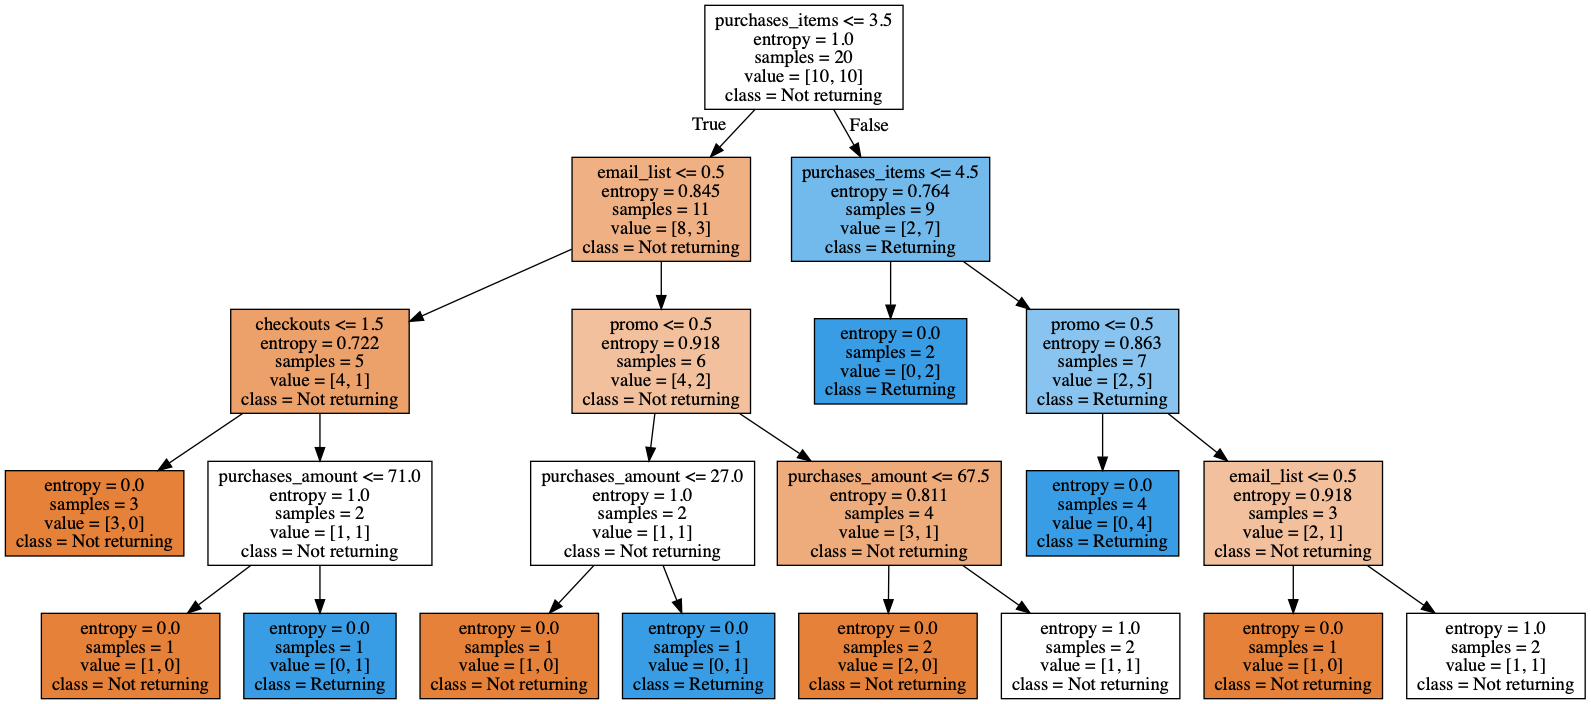

In [33]:
# The model:
from sklearn import tree

# a convenieance for displaying visualizations:
from IPython.display import Image

# Packages for rendering our tree
import pydotplus
import graphviz

# Initialize and train our tree
decision_tree = tree.DecisionTreeClassifier(
        criterion = 'entropy',
        max_features=1,
        max_depth=4,
        #random_state=1337
        )
decision_tree.fit(customers, repeat_customer)

# Rendering our tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not returning', 'Returning'],
    filled=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())



In [34]:
preds = decision_tree.predict(customers)
not_returning = sum(preds)
returning = len(preds) - not_returning
print("Not returning: {}".format(not_returning))
print("Returning: {}".format(returning))

Not returning: 8
Returning: 12


Not returning: 12

Returning: 8

* Changing `max_depth`  from 4 to 10:

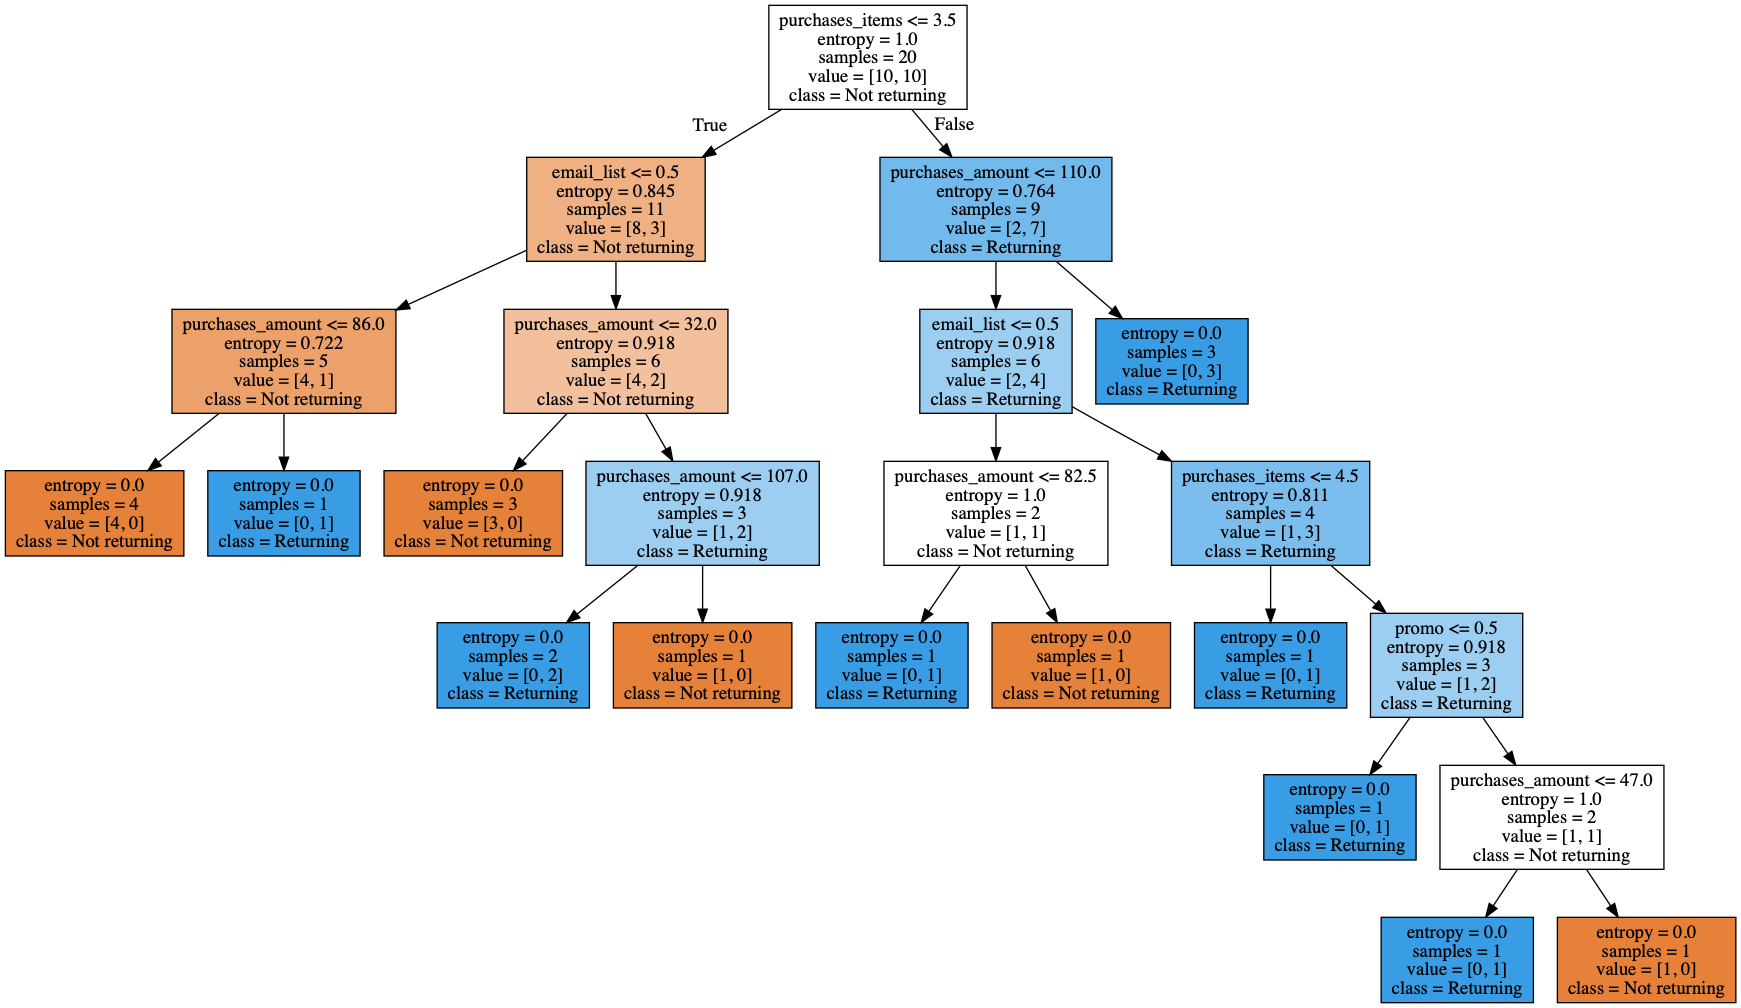

In [35]:
from sklearn import tree

# a convenieance for displaying visualizations:
from IPython.display import Image

# Packages for rendering our tree
import pydotplus
import graphviz

# Initialize and train our tree
decision_tree = tree.DecisionTreeClassifier(
        criterion = 'entropy',
        max_features=1,
        max_depth=10,
        #random_state=1337
        )
decision_tree.fit(customers, repeat_customer)

# Rendering our tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not returning', 'Returning'],
    filled=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [36]:
preds = decision_tree.predict(customers)
not_returning = sum(preds)
returning = len(preds) - not_returning
print("Not returning: {}".format(not_returning))
print("Returning: {}".format(returning))

Not returning: 10
Returning: 10


`max_depth` to 1:

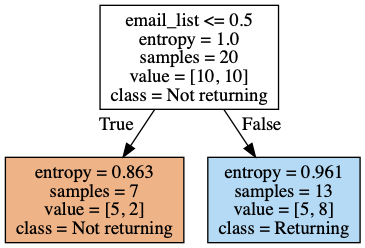

In [37]:
from sklearn import tree

# a convenieance for displaying visualizations:
from IPython.display import Image

# Packages for rendering our tree
import pydotplus
import graphviz

# Initialize and train our tree
decision_tree = tree.DecisionTreeClassifier(
        criterion = 'entropy',
        max_features=1,
        max_depth=1,
        #random_state=1337
        )
decision_tree.fit(customers, repeat_customer)

# Rendering our tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not returning', 'Returning'],
    filled=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [38]:
preds = decision_tree.predict(customers)
not_returning = sum(preds)
returning = len(preds) - not_returning
print("Not returning: {}".format(not_returning))
print("Returning: {}".format(returning))

Not returning: 13
Returning: 7
